### Combine the data from several files

In [1]:
import json
import numpy as np
from scipy import stats
import itertools
from simulate import find_mean_std_mse
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
#%matplotlib notebook
#%matplotlib inline

#play with this for better figure sizes 
mpl.rcParams['figure.figsize'] = (7,7)

In [3]:
PATH = "data_experiments/"

In [4]:
def plot_mean_and_confidence(plot_range, mean, mean_label, confidence_interval, 
                             confidence_interval_title):
    """
    Plot the mean and some kind of confidence interval (standard deviation or
    mean-squared-error)
    
    Parameters:
    ----------
    plot_range: iterable
    mean: an iterable
        the mean of the values at that point
    confidence_interval: an iterable
        Representing the  interval of confidence in that point. 
        The iterable should have length plot_range.
    confidence_interval_title: a string
    
    """
    
    lower_bound = np.array(mean)-np.array(confidence_interval)
    upper_bound = np.array(mean)+np.array(confidence_interval)
    plt.plot(plot_range, mean, label=mean_label)
    if confidence_interval_title:
        plt.fill_between(plot_range, lower_bound, upper_bound, 
                         label='{}'.format(confidence_interval_title),
                         alpha=0.2)
    else:
        plt.fill_between(plot_range, lower_bound, upper_bound, alpha=0.2)
        
        
def plot_results(*args, **kwargs):
    """plot results from simulations
    
    Parameters:
        args: 1 or more dicts. The dicts should have for the keys numerical
            input values and for the values iterables of numbers.
        kwargs: at least the arguments xlabel, ylabel, title
        
    """
    for argument in args:
        data, meta_dict = argument
        variable_range, mean, std, batches_std = (
            find_mean_std_mse(data, 10)
        )
        
        if kwargs['std_of_batches']: 
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     batches_std, "batches stdev")
        else:
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     std, "stdev")
    
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.legend()
    plt.title(kwargs['title'])
    plt.show()

### load the data for the maximum nudges

In [5]:
def dict_keys_from_string_to_int(dictionary):
    return {int(k):v for k,v in dictionary.items()}

def files_to_dict(file_names):
    """ Load the data from the files and make keys into ints"""
    dictionaries = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            dictionaries.append(json.load(f))

    dictionaries = [dict_keys_from_string_to_int(i) for i in dictionaries]
    return dictionaries

def compare_settings(value_to_scores, min_value, max_value):
    value_to_average_scores = {}
    for i in range(min_value, max_value+1, 1):
        average_impacts = []
        for count, dirichlet_dict in enumerate(value_to_scores):
            try:
                average_impacts.append(np.mean(dirichlet_dict[i]))
            except KeyError:
                print("the {} file has variable {} missing".format(i, count))

        value_to_average_scores[i] = average_impacts

    return value_to_average_scores

def flip_sign_values_dict(dictionary):
    for key, values in dictionary.items():
        dictionary[key] = [-value for value in values]
        
    return dictionary

def find_max_scores_per_value(dictionaries, min_value, max_value):
    value_to_maximum_scores = {}
    for i in range(min_value, max_value+1, 1):
        impacts = []
        for count, dictionary in enumerate(dictionaries):
            try:
                impacts.append(dictionary[i])
            except KeyError:
                print("the {} file has variable {} missing".format(i, count))

        max_impacts = [max(scores) for scores in list(zip(*impacts))]
        value_to_maximum_scores[i] = max_impacts

    return value_to_maximum_scores

### get maximum nudge impacts

In [6]:
def get_max_impacts(number_of_vars, number_of_states, percentage_max_entropy_size, 
                    nudge_type, dist_start, dist_end):
    filename_to_save_impacts =  "impacts_{}var_{}states_{}entropy_{}_nudge_dists{}-{}.json".format(
        number_of_vars, number_of_states, percentage_max_entropy_size, nudge_type, dist_start, dist_end
    )
    with open("data_experiments/" + filename_to_save_impacts, 'r') as f:
        impacts = json.load(f)
        
    return impacts



In [ ]:
NUMBER_OF_STATES = 3
PERCENTAGE_MAX_ENTROPY_SIZE = 75
nudge_types = ["individual", "local", "synergistic", "global"]
numbers_of_var = [2, 3, 4, 5, 6, 7]
for nudge_type in nudge_types:
    print(nudge_type)
    var_to_impacts = {}
    for number_of_var in numbers_of_var:
        print(number_of_var)
        if nudge_type == "synergistic" and number_of_var==2:
            continue
        if nudge_type == "local" and number_of_var==2:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                "individual", dist_start=100, dist_end=200
            )
        else:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                nudge_type, dist_start=100, dist_end=200
            )

            if nudge_type == "local" or nudge_type == "synergistic":
                impacts = [-1*impact for impact in impacts]

        var_to_impacts[number_of_var] = impacts
        
    variable_range, mean, std, batches_std = (
        find_mean_std_mse(var_to_impacts, 10)
    )
    std2 = list(2*np.array(std))
    plot_mean_and_confidence(variable_range, mean, nudge_type, std2, None)
    
plt.xlabel("number of variables")
plt.ylabel("nudge impact")
plt.title("max nudge impacts for distribution with {}% of the max entropy".format(PERCENTAGE_MAX_ENTROPY_SIZE))
plt.legend()
plt.show()



### Validate results maximum nudge impacts using a different process to generate the distributions

individual
2
3
4
5
6
7
local
2
3
4
5
6
7
synergistic
2
3
4
5
6
7
global
2
3
4
5
6
7


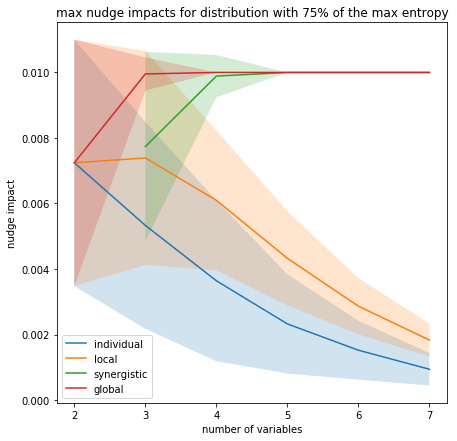

In [14]:
NUMBER_OF_STATES = 3
PERCENTAGE_MAX_ENTROPY_SIZE = 75
nudge_types = ["individual", "local", "synergistic", "global"]
numbers_of_var = [2, 3, 4, 5, 6, 7]
for nudge_type in nudge_types:
    print(nudge_type)
    var_to_impacts = {}
    for number_of_var in numbers_of_var:
        print(number_of_var)
        if nudge_type == "synergistic" and number_of_var==2:
            continue
        if nudge_type == "local" and number_of_var==2:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                "individual", dist_start=200, dist_end=300
            )
        else:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                nudge_type, dist_start=200, dist_end=300
            )

            if nudge_type == "local" or nudge_type == "synergistic":
                impacts = [-1*impact for impact in impacts]

        var_to_impacts[number_of_var] = impacts
        
    variable_range, mean, std, batches_std = (
        find_mean_std_mse(var_to_impacts, 10)
    )
    std2 = list(2*np.array(std))
    plot_mean_and_confidence(variable_range, mean, nudge_type, std2, None)
    
plt.xlabel("number of variables")
plt.ylabel("nudge impact")
plt.title("max nudge impacts for distribution with {}% of the max entropy".format(PERCENTAGE_MAX_ENTROPY_SIZE))
plt.legend()
plt.show()


### Get random nudge impacts

In [ ]:
def get_random_impacts(number_of_vars, number_of_states, percentage_max_entropy_size, 
                       nudge_type, dist_start, dist_end):
    filename_to_save_impacts =  "random_impacts_{}var_{}states_{}entropy_{}_nudge_dists{}-{}.json".format(
        number_of_vars, number_of_states, percentage_max_entropy_size, nudge_type, dist_start, dist_end 
    )
    with open("data_experiments/" + filename_to_save_impacts, 'r') as f:
        impacts = json.load(f)
        
    return impacts



In [ ]:
NUMBER_OF_STATES = 3
DIST_START, DIST_END = 100, 200
PERCENTAGE_MAX_ENTROPY_SIZE = 75

nudge_types = ["individual", "focused", "local", "synergistic", "global"]
#nudge_types = ["individual", "local", "synergistic", "global"]
#nudge_types = ["local", "synergistic", "global"]
#nudge_types = ["synergistic", "global"]

numbers_of_var = [2, 3, 4, 5, 6, 7]
for nudge_type in nudge_types:
    print(nudge_type)
    var_to_impacts = {}
    for number_of_var in numbers_of_var:
        print(number_of_var)
        if nudge_type == "synergistic" and number_of_var==2:
            continue
        if (nudge_type == "local" or nudge_type == "global") and number_of_var==2:
            impacts = get_random_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                "individual", DIST_START, DIST_END
            )
        else:
            impacts = get_random_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                nudge_type, DIST_START, DIST_END
            )

        var_to_impacts[number_of_var] = impacts
        
    variable_range, mean, std, batches_std = (
        find_mean_std_mse(var_to_impacts, 10)
    )
    std2 = list(2*np.array(std))
    plot_mean_and_confidence(variable_range, mean, nudge_type, std2, None)
    
plt.xlabel("number of variables")
plt.ylabel("nudge impact")
plt.title("impact of average nudges for distribution with {}% of the max entropy".format(PERCENTAGE_MAX_ENTROPY_SIZE))
plt.legend()
plt.show()


### Combine data experiment impact on MI of minimalizing individual nudge impact

In [15]:
def load_files_json(file_names):
    dicts = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            dicts.append(json.load(f))
            
    return dicts

def update_dictkeys_unicode2string(dictionary):
    return {str(k):v for k,v in dictionary.items()}

def combine_data_dicts(dictionaries):
    """
    Combine data dicts, meaning that all data of the same key are merged into a new dict
    
    Parameters:
    ----------
    dictionaries: a list of dicts
        Every key of the dicts should have a list as values 

    """
    new_dict = {}
    for dictionary in dictionaries:
        for key, values in dictionary.items():
            if key in new_dict:
                new_dict[key].extend(values)
            else:
                new_dict[key] = values
                
    return new_dict

def get_average_values_dict(dictionary):
    """take average of all values dictionary"""
    return {k:np.mean(v) for k, v in dictionary.items()}

#for 2 input vars with 5 states
file_name_format2 = "minimize_individual_focused_nudge_impact_kl_divergence_inspect_change_MI_2var_5states{}.json"
files_vars2 = [PATH + file_name_format2.format(i) for i in ["", 1, 3, 4, 5, 6]]
dictionaries_vars2 = load_files_json(files_vars2)
dictionaries_vars2 = [update_dictkeys_unicode2string(dictionary) for dictionary in dictionaries_vars2]
dictionary_vars2 = combine_data_dicts(dictionaries_vars2)
print(get_average_values_dict(dictionary_vars2))

#for 3 input vars with 5 states
file_name_format3 = "minimize_individual_focused_nudge_impact_inspect_change_MI_3var_5states{}.json"
files_vars3 = [PATH + file_name_format3.format(i) for i in ["", 2, 3, 4, 5]]
dictionaries_vars3 = load_files_json(files_vars3)
dictionaries_vars3 = [update_dictkeys_unicode2string(dictionary) for dictionary in dictionaries_vars3]
dictionary_vars3 = combine_data_dicts(dictionaries_vars3)
print(get_average_values_dict(dictionary_vars3))

file_vars4 = "minimize_individual_focused_nudge_impact_inspect_change_MI_4var_5states.json"
dictionaries_vars4 = load_files_json([PATH + file_vars4])
dictionary_vars4 = update_dictkeys_unicode2string(dictionaries_vars4[0])
print(get_average_values_dict(dictionary_vars4))

{'impact_after': 3.007298611341186e-05, 'mi_after': 0.14667514319890104, 'impact_before': 5.7637418943678235e-05, 'mi_before': 0.21959086454706087}
{'impact_after': 7.172282444333051e-06, 'mi_after': 0.054871355930750675, 'impact_before': 1.2987512109998274e-05, 'mi_before': 0.070452646416604744}
{'impact_after': 1.5486815215445593e-06, 'mi_before': 0.019623418020733245, 'impact_before': 2.2681870853415616e-06, 'mi_after': 0.017394584143839334}


### Correlation MI and individual nudge impact

In [23]:
def load_data_correlation_MI_nudge_impact(var_to_file_names):
    """
    Parameters:
    ----------
    var_to_files: a dict
    
    """
    var_to_MI_and_nudge_impact = {}
    for number_of_var, file_names in var_to_file_names.items():
        file_names = [PATH+file_name for file_name in file_names]
        if number_of_var == 5:
            mi_and_nudge_impact_lists = load_files_json(file_names)
            var_to_MI_and_nudge_impact[number_of_var] = [
                list(itertools.chain.from_iterable(mi_and_nudge_impact_lists))
            ]
        else:
            var_to_MI_and_nudge_impact[number_of_var] = load_files_json(file_names)[0]

    return var_to_MI_and_nudge_impact

focused_nudge_kl_divergence_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_nudge_impact_1var_5states_min_output001_ex1.json"],
    2: ["correlation_MI_individual_nudge_impact_2var_5states_min_output001_ex2.json"],
    3: ["correlation_MI_individual_nudge_impact_3var_5states_min_output001_exp3.json"],
    4: ["correlation_MI_individual_nudge_impact_4var_5states_min_output001_exp4.json"],
    5: [
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp5_points0_20.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp6_point20_40.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp3_points40_60.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_ex2_points60_80.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_ex1_points80_100.json"
    ]
}

focused_nudge_l1norm_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_nudge_impact_1var_5states_l1norm_ex1.json"],
    2: ["correlation_MI_individual_nudge_impact_2var_5states_l1norm_ex2.json"],
    3: ["correlation_MI_individual_nudge_impact_3var_5states_l1norm_exp3.json"],
    4: ["correlation_MI_individual_nudge_impact_4var_5states_l1norm_exp4.json"],
    5: [
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_exp5_points0_20.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_exp6_point20_40.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_ex1_points40_60.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_ex2_points60_80.json"
    ]
}

vector_nudge_kl_divergence_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_vector_nudge_impact_1var_5states_min_output001_ex1.json"],
    2: ["correlation_MI_individual_vector_nudge_impact_2var_5states_kl-divergence_ex2.json"],
    3: ["correlation_MI_individual_vector_nudge_impact_3var_5states_kl-divergence_ex1.json"],
    4: ["correlation_MI_individual_vector_nudge_impact_4var_5states_kl-divergence_ex2.json"],
    5: [
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex3_points0_30.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex1_points30_60.json"
    ]
}

vector_nudge_l1norm_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_vector_nudge_impact_1var_5states_l1norm_ex1.json"],
    2: ["correlation_MI_individual_vector_nudge_impact_2var_5states_l1norm_ex2.json"],
    3: ["correlation_MI_individual_vector_nudge_impact_3var_5states_l1norm_ex3.json"],
    4: ["correlation_MI_individual_vector_nudge_impact_4var_5states_l1norm_ex4.json"],
    5: [
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_ex5_point0_30.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_exp6_points30_60.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_ex5_point60_90.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_exp6_points90_120.json"
    ]
}

var_to_focused_nudge_kl_divergence_impact_and_MI = load_data_correlation_MI_nudge_impact(
    focused_nudge_kl_divergence_impact_and_MI_var_to_files
)

var_to_focused_nudge_l1norm_impact_and_MI = load_data_correlation_MI_nudge_impact(
    focused_nudge_l1norm_impact_and_MI_var_to_files
)

var_to_vector_nudge_kl_divergence_impact_and_MI = load_data_correlation_MI_nudge_impact(
    vector_nudge_kl_divergence_impact_and_MI_var_to_files
)

var_to_vector_nudge_l1norm_impact_and_MI = load_data_correlation_MI_nudge_impact(
    vector_nudge_l1norm_impact_and_MI_var_to_files
)



In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Plot correlations

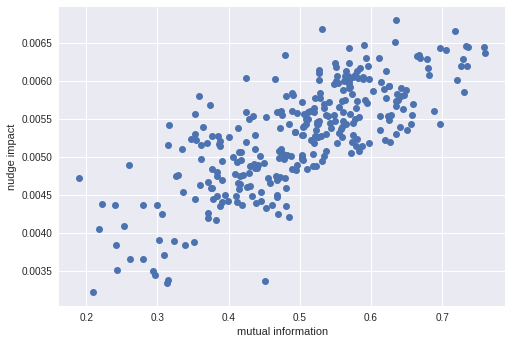

LinregressResult(slope=125.6325056840879, intercept=-0.16402149230678781, rvalue=0.76221013688809747, pvalue=3.1387638272674982e-58, stderr=6.1807999221958942)


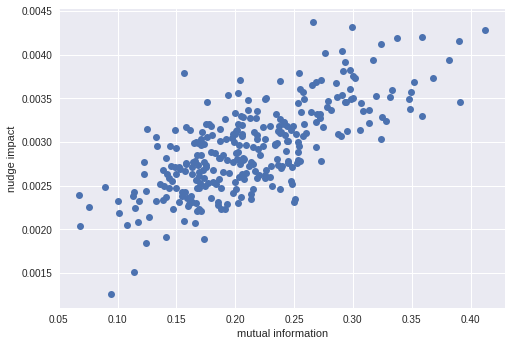

LinregressResult(slope=89.411054267560175, intercept=-0.04856203234136236, rvalue=0.72413306578890024, pvalue=5.2076261308813956e-50, stderr=4.9328728305701626)


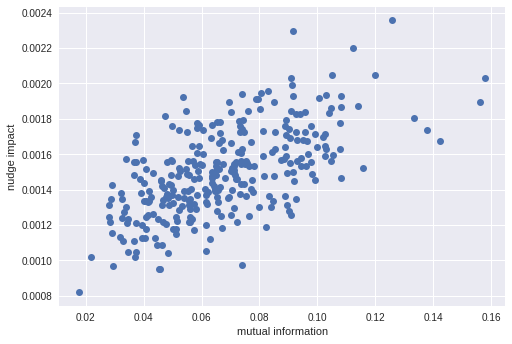

LinregressResult(slope=59.04889882834987, intercept=-0.020815959007059223, rvalue=0.61560344332808559, pvalue=1.1139099920393731e-32, stderr=4.3788468912133229)


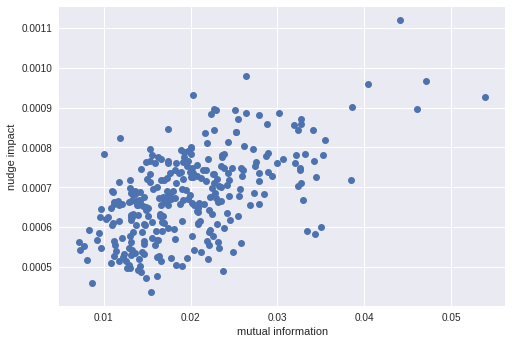

LinregressResult(slope=38.999448521211413, intercept=-0.006582060333640026, rvalue=0.57604945948900776, pvalue=6.4418440633008953e-28, stderr=3.2057752983719325)


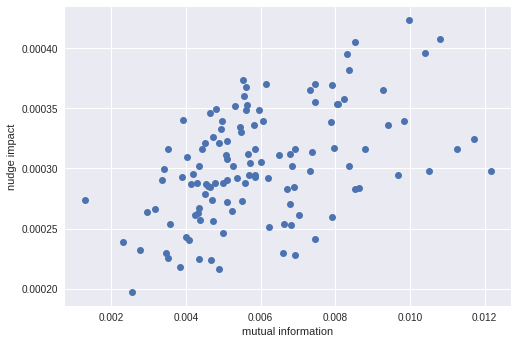

LinregressResult(slope=21.885846285228439, intercept=-0.00064392553620611515, rvalue=0.48082330259052486, pvalue=2.7231520084691146e-08, stderr=3.6740583521252077)


In [25]:
#import seaborn as sns
#add seaborn linregress on own computer

# dict_to_use = var_to_focused_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_focused_nudge_l1norm_impact_and_MI
# dict_to_use = var_to_vector_nudge_kl_divergence_impact_and_MI
dict_to_use = var_to_vector_nudge_l1norm_impact_and_MI

for var, impact_nudges_and_mi in dict_to_use.items():
    if var == 5:
        impact_nudges_and_mi=impact_nudges_and_mi[0]

    impact_nudges = [item[0] for item in impact_nudges_and_mi] 
    mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]
        
    plt.plot(mutual_information_sizes, impact_nudges, 'o')
    plt.xlabel("mutual information")
    plt.ylabel("nudge impact")
    plt.show()
    print(stats.linregress(impact_nudges, mutual_information_sizes))


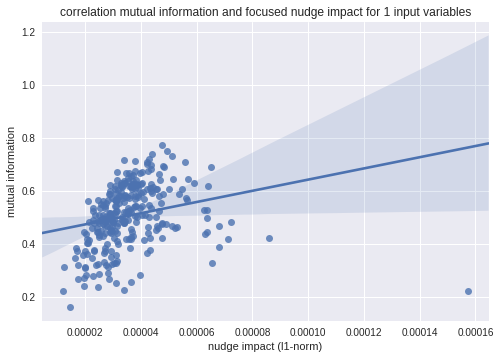

LinregressResult(slope=2110.8070236150261, intercept=0.4312811252136568, rvalue=0.24243729387234728, pvalue=3.2018897004646699e-05, stderr=499.47369311668211)


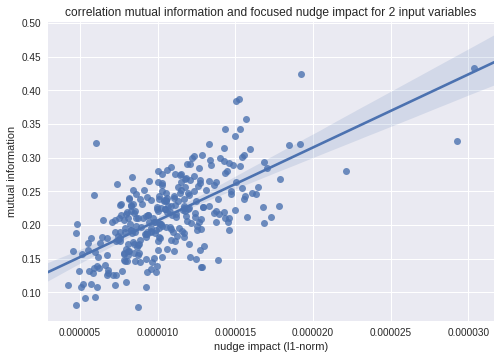

LinregressResult(slope=10860.331523739917, intercept=0.09796551930924953, rvalue=0.65898954064400661, pvalue=9.6120024461048051e-39, stderr=718.06226222618034)


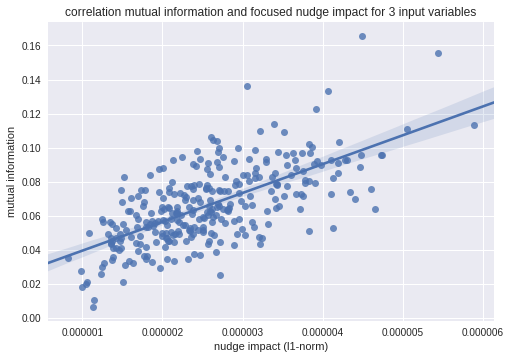

LinregressResult(slope=16925.251162075048, intercept=0.022646910002063966, rvalue=0.6627890794789989, pvalue=2.5313017533378306e-39, stderr=1107.6971622758679)


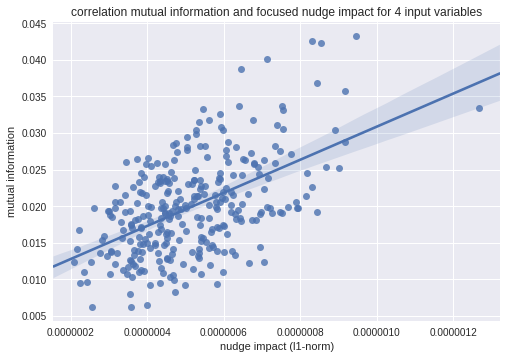

LinregressResult(slope=22593.388426830541, intercept=0.0082795727493562964, rvalue=0.52994453067684733, pvalue=4.0132858818352899e-23, stderr=2094.3787378027309)


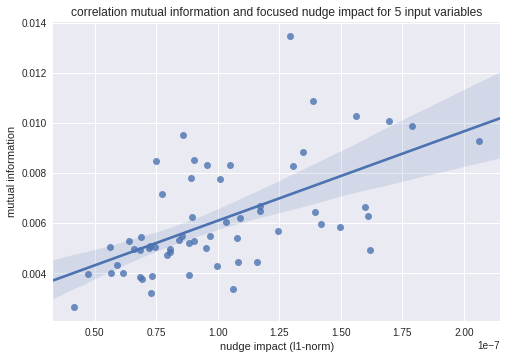

LinregressResult(slope=35634.492456292159, intercept=0.0025311229418549137, rvalue=0.5858353647888922, pvalue=8.7732545271402659e-07, stderr=6472.8650294131694)


In [27]:
import seaborn as sns
import pandas as pd

# dict_to_use = var_to_focused_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_focused_nudge_l1norm_impact_and_MI
dict_to_use = var_to_vector_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_vector_nudge_l1norm_impact_and_MI

for var, impact_nudges_and_mi in dict_to_use.items():
    if var == 5:
        impact_nudges_and_mi = impact_nudges_and_mi[0]       
        impact_nudges = [item[0] for item in impact_nudges_and_mi]
        mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]
    else:
        impact_nudges = [item[0] for item in impact_nudges_and_mi] 
        mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]

    
    df = pd.DataFrame({"nudge impact (l1-norm)": impact_nudges, "mutual information": mutual_information_sizes}) 
    sns.regplot("nudge impact (l1-norm)", "mutual information", df)
    plt.title("correlation mutual information and focused nudge impact for {} input variables".format(var))
    sns.plt.show()
    print(stats.linregress(impact_nudges, mutual_information_sizes))


#### Relation MI and nudge impact for 1 input and 1 output 

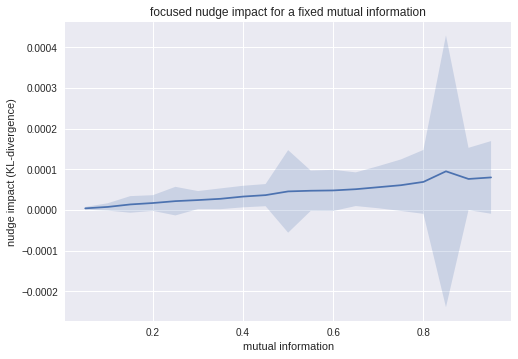

LinregressResult(slope=8.9538989938022217e-05, intercept=-1.7405298760888005e-06, rvalue=0.97631836222698176, pvalue=9.7030574616825959e-13, stderr=4.8120551125733056e-06)


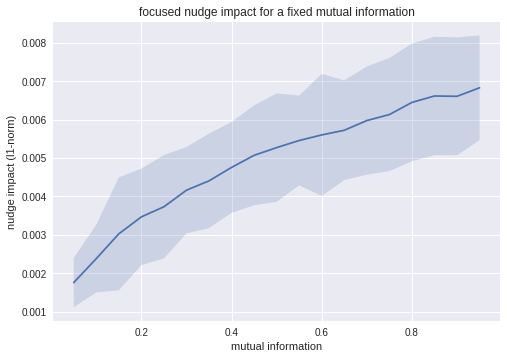

LinregressResult(slope=0.0051891143725578959, intercept=0.0023233862251373586, rvalue=0.97543610692168548, pvalue=1.3201901114868162e-12, stderr=0.00028421699787717131)


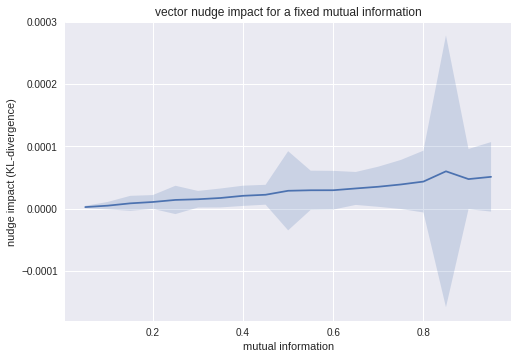

LinregressResult(slope=5.6472395753809007e-05, intercept=-1.2395681835851484e-06, rvalue=0.97589136493415829, pvalue=1.1278406176617126e-12, stderr=3.0632195117253218e-06)


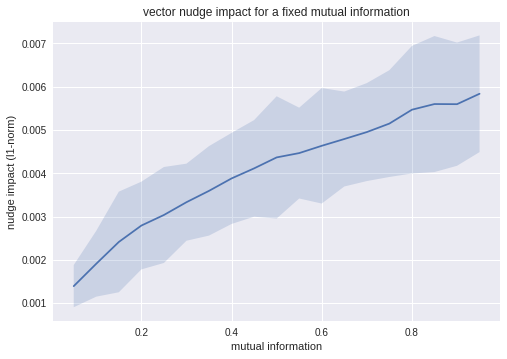

LinregressResult(slope=0.0045756558853221885, intercept=0.0017818538765058227, rvalue=0.98277524104022795, pvalue=6.625213410175093e-14, stderr=0.0002086834501952579)


In [44]:
def plot_nudge_impact_given_mi(data_dict, title, ylabel):
    plot_range, mean, std, batches_std = find_mean_std_mse(data_dict, batch_size=1)
    lower_bound = np.array(mean) - 2*np.array(std)
    upper_bound = np.array(mean) + 2*np.array(std)
    plt.plot(plot_range, mean, label="mean")
    plt.fill_between(plot_range, lower_bound, upper_bound, 
                     label='{}'.format("std"),
                     alpha=0.2)

    plt.xlabel("mutual information")
    plt.ylabel(ylabel)
    #plt.legend()
    plt.title(title)
    plt.show()

    print(stats.linregress(np.array(plot_range), np.array(mean)))

def string_keys_to_numbers(data_dict):
    for mi_value, values in data_dict.items():
        data_dict[round((float(mi_value)*100.0))/100.0] = values
        data_dict.pop(mi_value, None)
    
    return data_dict
    
#load the data
with open("data_experiments/individual_nudge_impact_kl_divergence_focused_given_MI2.json", 'r') as f:
    focused_kl_divergence = json.load(f)
    
with open("data_experiments/individual_nudge_impact_l1norm_focused_given_MI2.json", 'r') as f:
    focused_l1norm = json.load(f)

with open("data_experiments/individual_nudge_impact_kl_divergence_vector_given_MI2.json", 'r') as f:
    vector_kl_divergence = json.load(f)

with open("data_experiments/individual_nudge_impact_absolute_vector_given_MI2.json", 'r') as f:
    vector_l1norm = json.load(f)
    
focused_kl_divergence = string_keys_to_numbers(focused_kl_divergence)
focused_l1norm = string_keys_to_numbers(focused_l1norm)
vector_kl_divergence = string_keys_to_numbers(vector_kl_divergence)
vector_l1norm = string_keys_to_numbers(vector_l1norm)

plot_nudge_impact_given_mi(
    focused_kl_divergence, "focused nudge impact for a fixed mutual information", "nudge impact (KL-divergence)"
)
plot_nudge_impact_given_mi(
    focused_l1norm, "focused nudge impact for a fixed mutual information", "nudge impact (l1-norm)"
)
plot_nudge_impact_given_mi(
    vector_kl_divergence, "vector nudge impact for a fixed mutual information", "nudge impact (KL-divergence)"
)
plot_nudge_impact_given_mi(
    vector_l1norm, "vector nudge impact for a fixed mutual information", "nudge impact (l1-norm)"
)
    

[  9.88101644e-05   3.31548869e-05   4.32767086e-05   4.08049574e-05
   8.15370835e-05   7.06159590e-05   6.10871387e-05   4.55157156e-05
   4.91631832e-05   4.04839539e-05   3.83846468e-05   1.08126253e-04
   6.96575776e-05   4.83032982e-05   6.83791864e-05   1.13760814e-04
   1.17246787e-04   5.01736891e-05   7.45421335e-05   6.41044454e-05
   4.14626982e-04   7.20909625e-05   5.37656319e-05   6.89670621e-05
   6.49798755e-05   4.05534869e-05   5.90770981e-05   5.21004145e-05
   7.36286931e-05   6.71421231e-05   4.74682268e-05   2.27300524e-04
   9.79527002e-05   4.69405189e-05   1.13409265e-04   5.24213252e-05
   7.08736342e-05   6.67849489e-05   5.47745393e-05   1.38235891e-04
   3.80719334e-05   3.08679425e-04   4.17703144e-05   5.96407995e-05
   5.51556661e-05   1.15047449e-04   3.80784935e-05   6.41161851e-05
   7.08766298e-05   4.38936554e-05   3.11109943e-05   2.36472401e-04
   9.07249551e-05   2.81444307e-05   1.07923055e-04   5.27698857e-05
   5.58360087e-05   1.46657718e-03

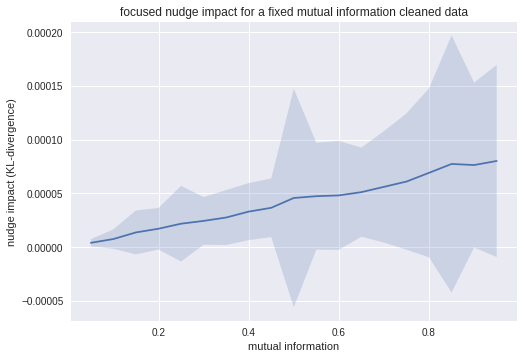

LinregressResult(slope=8.5164746350627175e-05, intercept=-4.9074599397592647e-07, rvalue=0.99566020703417202, pvalue=5.6395522273678495e-19, stderr=1.9306433387367887e-06)


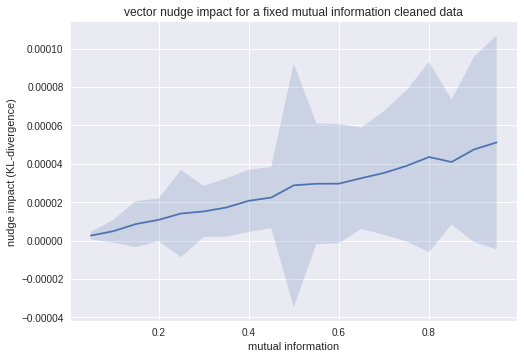

LinregressResult(slope=5.1788244599036121e-05, intercept=9.8760717778532042e-08, rvalue=0.99529199900952325, pvalue=1.1254627120654293e-18, stderr=1.2231443689871813e-06)


In [45]:
with open("data_experiments/individual_nudge_impact_kl_divergence_focused_given_MI2.json", 'r') as f:
    focused_kl_divergence = json.load(f)
    
with open("data_experiments/individual_nudge_impact_kl_divergence_vector_given_MI2.json", 'r') as f:
    vector_kl_divergence = json.load(f)
    
focused_kl_divergence = string_keys_to_numbers(focused_kl_divergence)
vector_kl_divergence = string_keys_to_numbers(vector_kl_divergence)

print(np.array(focused_kl_divergence[0.85]))
print(np.array(vector_kl_divergence[0.85]))
focused_kl_divergence[0.85] = [i for i in focused_kl_divergence[0.85] if i < 1e-03]
vector_kl_divergence[0.85] = [i for i in vector_kl_divergence[0.85] if i < 1e-04]

plot_nudge_impact_given_mi(
    focused_kl_divergence, "focused nudge impact for a fixed mutual information cleaned data", "nudge impact (KL-divergence)"
)
plot_nudge_impact_given_mi(
    vector_kl_divergence, "vector nudge impact for a fixed mutual information cleaned data", "nudge impact (KL-divergence)"
)


In [28]:
with open("data_experiments/relation_MI_nudge_impact_1input_non_biased1.json", 'r') as f:
    data_dict = json.load(f)

with open("data_experiments/relation_MI_nudge_impact_1input_non_biased2.json", 'r') as f:
    data_dict1 = json.load(f)
    
for mi_value, values in data_dict1.items():
    data_dict1[round((float(mi_value)*1000.0))/1000.0] = values
    data_dict1.pop(mi_value, None)
    
for mi_value, values in data_dict.items():
    data_dict[round((float(mi_value)*100.0))/100.0] = values
    data_dict.pop(mi_value, None)
    
data_dict.update(data_dict1)

In [29]:
print({k:len(v) for k,v in data_dict.items()})
plot_range, mean, std, batches_std = find_mean_std_mse(data_dict, batch_size=1)
print(np.array(data_dict[0.85]))

{0.25: 176, 0.5: 178, 0.15: 187, 0.05: 191, 0.4: 176, 0.2: 182, 0.85: 147, 0.3: 184, 0.1: 193, 0.6: 176, 0.9: 149, 0.95: 154, 0.7: 161, 0.35: 177, 0.55: 174, 0.8: 159, 0.65: 177, 0.45: 173, 0.75: 156}
[  1.26998252e-04   1.44270975e-04   1.07568360e-04   3.30894913e-04
   1.53804637e-04   2.20709570e-04   1.52134140e-04   2.53170398e-04
   9.01302165e-05   1.14768755e-04   1.61171445e-04   1.55599242e-04
   1.25725452e-04   1.54449188e-04   7.63510060e-05   2.18899258e-04
   2.78155980e-04   2.68971926e-04   1.62856983e-04   1.50213650e-04
   1.38334054e-04   1.16913301e-04   1.44145768e-04   1.40102752e-04
   1.20116372e-04   2.73669814e-04   1.41861687e-04   1.88118192e-04
   1.50843163e-04   1.08248188e-04   2.97404907e-04   1.94923347e-04
   1.68833793e-04   1.18741482e-04   2.02001789e-04   1.64145835e-04
   6.00331068e-04   1.18103172e-04   1.49451380e-04   2.82152918e-04
   1.81261501e-04   1.55084246e-04   1.79068678e-04   2.55787289e-04
   1.66708046e-04   1.02859609e-04   1.5

[  5.63876892e-06   9.06797375e-06   1.50488747e-05   6.16509106e-06
   2.41769928e-05   3.42485542e-05   4.45521202e-05   3.25948320e-05
   2.93409072e-05   5.68116976e-05   4.63864871e-05   5.12153585e-05
   8.48248850e-05   8.27947569e-05   9.24958039e-05   6.22403056e-05
  -2.19730591e-04   4.69872057e-05   1.12156640e-04]
[  1.63548856e-05   3.29129788e-05   5.50463723e-05   9.54495617e-05
   9.97293683e-05   1.13242248e-04   1.24652468e-04   1.63892225e-04
   1.75582341e-04   1.77281276e-04   2.11214503e-04   2.37244787e-04
   1.94495739e-04   2.26472456e-04   2.45250319e-04   2.89216520e-04
   6.73844329e-04   3.61444554e-04   3.08520783e-04]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


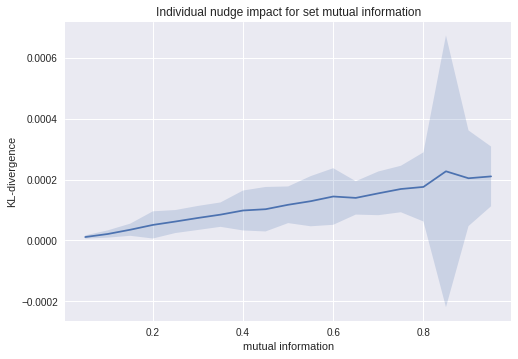

LinregressResult(slope=0.00022789858452829833, intercept=2.3366124522375788e-06, rvalue=0.99049913500194786, pvalue=4.3271560698196255e-16, stderr=7.6740678843879232e-06)

In [30]:
lower_bound = np.array(mean)-np.array(std)
upper_bound = np.array(mean)+np.array(std)
print(lower_bound)
print(upper_bound)
print(plot_range)
plt.plot(plot_range, mean, label="mean")
plt.fill_between(plot_range, lower_bound, upper_bound, 
                 label='{}'.format("std"),
                 alpha=0.2)

plt.xlabel("mutual information")
plt.ylabel("KL-divergence")
#plt.legend()
plt.title('Individual nudge impact for set mutual information')
plt.show()

stats.linregress(np.array(plot_range), np.array(mean))

In [31]:
data_dict[0.85] = [i for i in data_dict[0.85] if i < 1e-03]
print(np.array(data_dict[0.85]))

[  1.26998252e-04   1.44270975e-04   1.07568360e-04   3.30894913e-04
   1.53804637e-04   2.20709570e-04   1.52134140e-04   2.53170398e-04
   9.01302165e-05   1.14768755e-04   1.61171445e-04   1.55599242e-04
   1.25725452e-04   1.54449188e-04   7.63510060e-05   2.18899258e-04
   2.78155980e-04   2.68971926e-04   1.62856983e-04   1.50213650e-04
   1.38334054e-04   1.16913301e-04   1.44145768e-04   1.40102752e-04
   1.20116372e-04   2.73669814e-04   1.41861687e-04   1.88118192e-04
   1.50843163e-04   1.08248188e-04   2.97404907e-04   1.94923347e-04
   1.68833793e-04   1.18741482e-04   2.02001789e-04   1.64145835e-04
   6.00331068e-04   1.18103172e-04   1.49451380e-04   2.82152918e-04
   1.81261501e-04   1.55084246e-04   1.79068678e-04   2.55787289e-04
   1.66708046e-04   1.02859609e-04   1.58511859e-04   2.45900828e-04
   1.97313217e-04   2.64309829e-04   1.67066815e-04   1.67060892e-04
   4.77225065e-04   1.26638865e-04   3.08448434e-04   1.88282546e-04
   1.25438720e-04   2.04085477e-04

[  5.63876892e-06   9.06797375e-06   1.50488747e-05   6.16509106e-06
   2.41769928e-05   3.42485542e-05   4.45521202e-05   3.25948320e-05
   2.93409072e-05   5.68116976e-05   4.63864871e-05   5.12153585e-05
   8.48248850e-05   8.27947569e-05   9.24958039e-05   6.22403056e-05
   8.94305292e-05   4.69872057e-05   1.12156640e-04]
[  1.63548856e-05   3.29129788e-05   5.50463723e-05   9.54495617e-05
   9.97293683e-05   1.13242248e-04   1.24652468e-04   1.63892225e-04
   1.75582341e-04   1.77281276e-04   2.11214503e-04   2.37244787e-04
   1.94495739e-04   2.26472456e-04   2.45250319e-04   2.89216520e-04
   2.92655013e-04   3.61444554e-04   3.08520783e-04]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


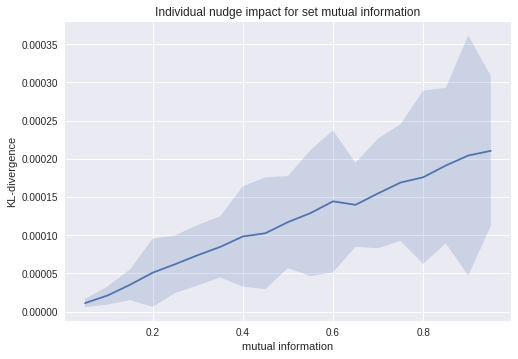

LinregressResult(slope=0.00021905301664645749, intercept=4.8639175613349607e-06, rvalue=0.99773681129635594, pvalue=2.2434410444148534e-21, stderr=3.5804556730979305e-06)

In [32]:
plot_range, mean, std, batches_std = find_mean_std_mse(data_dict, batch_size=1)
lower_bound = np.array(mean)-np.array(std)
upper_bound = np.array(mean)+np.array(std)
print(lower_bound)
print(upper_bound)
print(plot_range)
plt.plot(plot_range, mean, label="mean")
plt.fill_between(plot_range, lower_bound, upper_bound, 
                 label='{}'.format("std"),
                 alpha=0.2)

plt.xlabel("mutual information")
plt.ylabel("KL-divergence")
#plt.legend()
plt.title('Individual nudge impact for set mutual information')
plt.show()

stats.linregress(np.array(plot_range), np.array(mean))